In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('Skyserver_12_30_2019 4_49_58 PM.csv')

In [ ]:
df

objid          ra        dec         u         g  \
0      1237666301628060000   47.372545   0.820621  18.69254  17.13867   
1      1237673706652430000  116.303083  42.455980  18.47633  17.30546   
2      1237671126974140000  172.756623  -8.785698  16.47714  15.31072   
3      1237665441518260000  201.224207  28.771290  18.63561  16.88346   
4      1237665441522840000  212.817222  26.625225  18.88325  17.87948   
...                    ...         ...        ...       ...       ...   
99995  1237667968033620000  228.674917  19.179460  19.32631  18.82748   
99996  1237664818210470000  173.757382  36.441603  18.33687  17.30365   
99997  1237664295297290000  205.426531  38.499053  17.50690  15.63152   
99998  1237656537513130000  337.135144  -9.635967  19.33946  17.21436   
99999  1237670459113730000   37.440188  25.400888  18.11769  16.86279   

              r         i         z   run  rerun  camcol  field  \
0      16.55555  16.34662  16.17639  4849    301       5    771   
1      17.24116  17.32780  17.37114  6573    301       6    220   
2      15.55971  15.72207  15.82471  5973    301       1     13   
3      16.09825  15.70987  15.43491  4649    301       3    121   
4      17.47037  17.17441  17.05235  4649    301       3    191   
...         ...       ...       ...   ...    ...     ...    ...   
99995  18.65659  18.60481  18.60917  5237    301       5    134   
99996  17.16037  17.14895  17.14419  4504    301       2    111   
99997  15.22328  15.04469  15.28668  4382    301       4     97   
99998  16.29697  15.86745  15.51556  2576    301       2    105   
99999  16.31057  16.07582  15.94701  5817    301       5    120   

                 specobjid   class  redshift  plate    mjd  fiberid  
0      8168632633242440000    STAR  0.000115   7255  56597      832  
1      9333948945297330000    STAR -0.000093   8290  57364      868  
2      3221211255238850000    STAR  0.000165   2861  54583       42  
3      2254061292459420000  GALAXY  0.058155   2002  53471       35  
4      2390305906828010000  GALAXY  0.072210   2123  53793       74  
...                    ...     ...       ...    ...    ...      ...  
99995  4448615345201370000     QSO  0.438182   3951  55681      672  
99996  2265404129658560000    STAR -0.000497   2012  53493      340  
99997  2257446413900210000  GALAXY  0.004587   2005  53472       62  
99998   811847537492257000  GALAXY  0.084538    721  52228      268  
99999  2678586035360790000    STAR -0.000085   2379  53762      255  

[100000 rows x 18 columns]

In [ ]:
#Dropping the specified features
df = df.drop(columns=['objid', 'run', 'rerun', 'camcol', 'plate', 'field', 'mjd', 'fiberid', 'specobjid', 'redshift'])

# Exploratory Data Analysis before train-test split
- How many features?
- How many data records?
- Are there any missing/duplicated values?
- What is the target distribution?

In [ ]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ra      100000 non-null  float64
 1   dec     100000 non-null  float64
 2   u       100000 non-null  float64
 3   g       100000 non-null  float64
 4   r       100000 non-null  float64
 5   i       100000 non-null  float64
 6   z       100000 non-null  float64
 7   class   100000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 6.1+ MB


In [ ]:
#Summary statistics
df.describe()

ra            dec              u              g  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      177.512888      25.052056      18.637915      17.407128   
std        78.039070      20.567259       0.832284       0.985921   
min         0.013061     -19.495456      10.611810       9.668339   
25%       136.356526       6.770380      18.212902      16.852982   
50%       180.411688      23.918611      18.873250      17.515860   
75%       224.369107      40.344539      19.273302      18.056060   
max       359.999615      84.490494      19.599950      19.996050   

                   r              i              z  
count  100000.000000  100000.000000  100000.000000  
mean       16.881676      16.625534      16.467087  
std         1.133337       1.209532       1.281788  
min         9.005167       8.848403       8.947795  
25%        16.196607      15.865275      15.619960  
50%        16.890640      16.599885      16.428385  
75%        17.585750      17.344912      17.234625  
max        31.990100      32.141470      29.383740

In [ ]:
#Checking for missing values
df.isna().sum()

ra       0
dec      0
u        0
g        0
r        0
i        0
z        0
class    0
dtype: int64

In [ ]:
#Addressing missing values: Missing values are dropped because there is only 1 record of missing values
#in the respective columns. It will not affect the analysis much.
# df = df.dropna()

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

2

In [ ]:
#Similarly, duplicated values are dropped because there are few instances of these.
df = df.drop_duplicates(keep='last')

In [ ]:
#Target distribution
df['class'].value_counts()

GALAXY    51321
STAR      38096
QSO       10581
Name: class, dtype: int64

In [ ]:
#Number of features and records
features = df.columns.tolist()

print(f"Dimension of dataset: {df.shape}")
print(f"Number of features: {df.shape[1] -1}") #-1 class
print(f"The features are: {features[:-1]}")
print(f"Number of records: {df.shape[0]}")

Dimension of dataset: (99998, 8)
Number of features: 7
The features are: ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']
Number of records: 99998


## Exploratory Data Analysis before train-test split
- How many features: 7
- How many data records: 99,998
- Are there any missing/duplicated values: yes. missing and duplicated values are removed.
- What is the target distribution: 51,321 Galaxy, 38,096 Star, 10,581 QSO. This is a classification problem with 3 classes.

In [ ]:
y = df['class']
x = df.drop(columns='class')

In [ ]:
#Performing train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
#Create a validation set with the training dataset to optimize the random forest tree
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [ ]:
#Normal train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79998, 7)
(20000, 7)
(79998,)
(20000,)


In [ ]:
#Validation set
print(x_train1.shape)
print(x_val.shape)
print(y_train1.shape)
print(y_val.shape)

(63998, 7)
(16000, 7)
(63998,)
(16000,)


In [ ]:
xy_train = x_train.copy()
xy_train['class'] = y_train

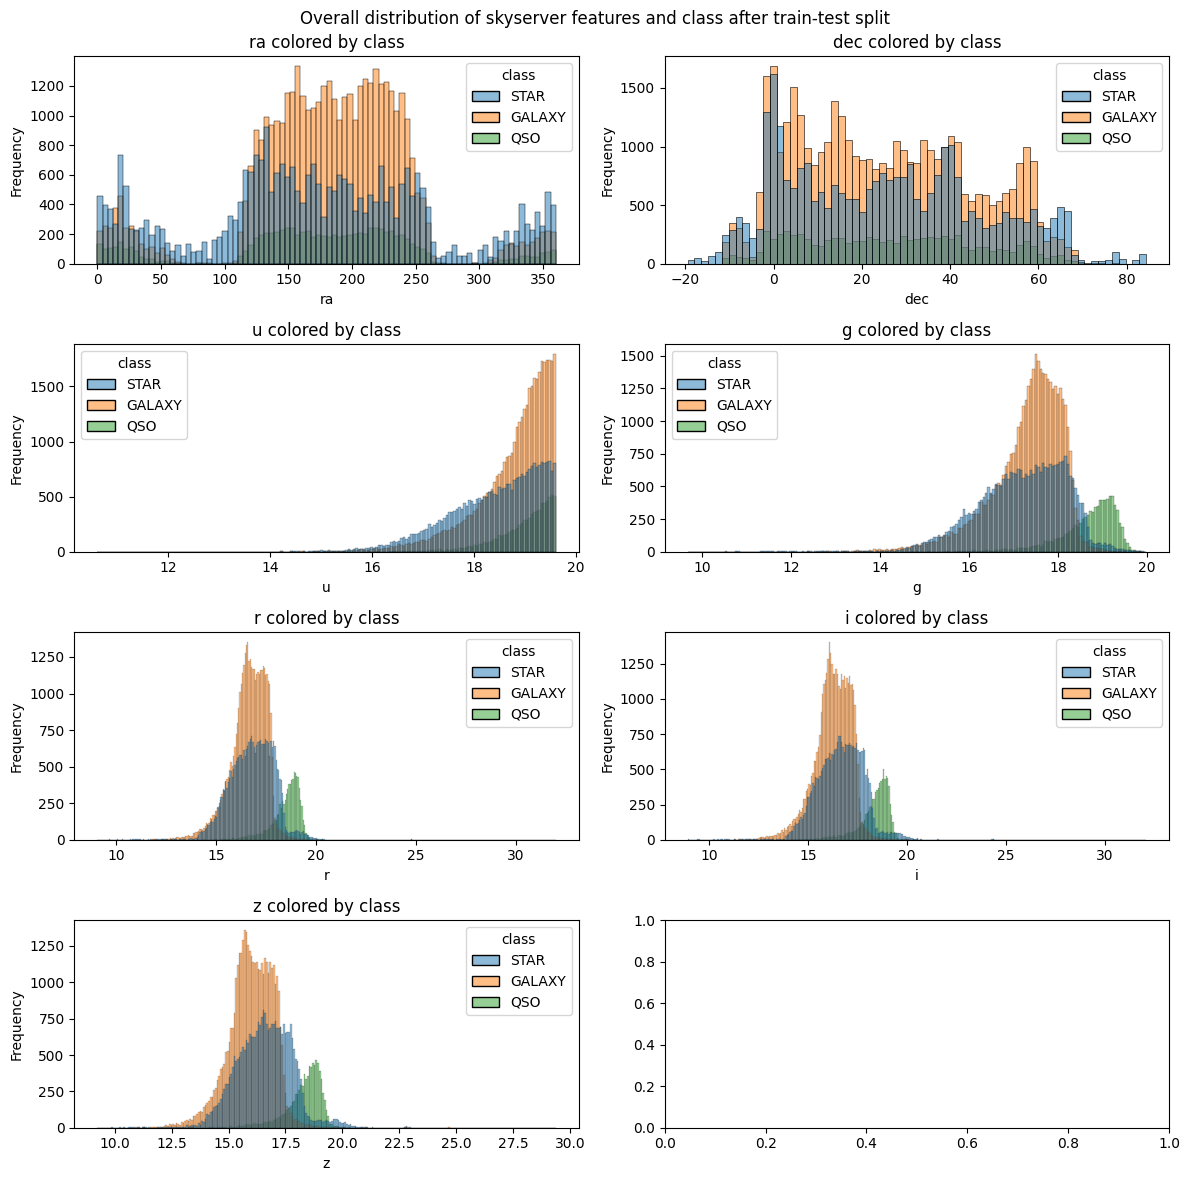

In [ ]:
#Data visualization of the training dataset
features = xy_train.columns.tolist()[:-1]
fig, axes = plt.subplots(4, 2, figsize = (12,12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.histplot(data=xy_train, x=feature, hue='class', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"{feature} colored by class")

plt.suptitle('Overall distribution of skyserver features and class after train-test split')
plt.tight_layout()
plt.show()

For some features, there seems to be certain distinctions between the features distribution and the target.

For instance: feature z.

# Modelling the Random Forest Classifier
- Number of trees optimization
- Depth optimization
- Optimal RF classifier

### Number of trees optimization

In [ ]:
#Tree optimization
val_score = []
train_score = []
trees = [5, 10, 15, 20, 100, 150, 200, 250, 300]

for n in trees:
    RF = RandomForestClassifier(n_estimators=n, random_state=1) #Ensure consistent RF
    #Training and testing on the validation set
    RF.fit(x_train1, y_train1)
    train_score.append(RF.score(x_train1, y_train1)) #Training accuracy
    val_score.append(RF.score(x_val, y_val)) #Testing accuracy

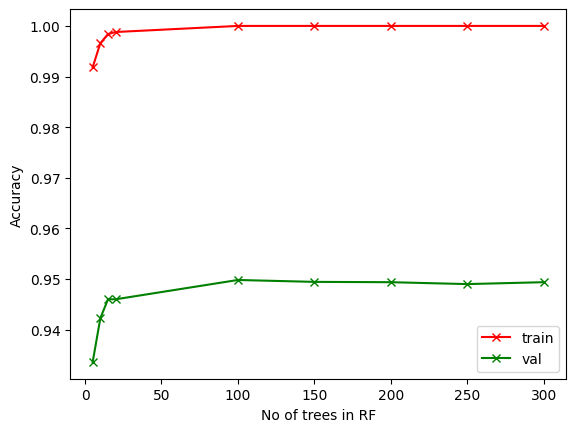

In [ ]:
plt.plot(trees, train_score,'r-x',label='train')
plt.plot(trees, val_score,'g-x', label='val')
plt.xlabel("No of trees in RF")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
#Optimal number of trees based on validation accuracy
ind = val_score.index(max(val_score))
opt_trees = trees[ind]
print(f"The optimal number of trees in the RF classifier: {opt_trees}")

The optimal number of trees in the RF classifier: 100


### Tree depth optimization

In [ ]:
#Create a baseline RF model with the optimal tree number
RF = RandomForestClassifier(n_estimators=opt_trees, random_state = 1)
RF.fit(x_train1, y_train1) #Training on the validation set
y_pred = RF.predict(x_test) #Predicting on the ACTUAL test set

In [ ]:
print(f"Score: {RF.score(x_test, y_test)}")
print(f"Classification Report: ")
print(classification_report(y_test, y_pred))

Score: 0.9507
Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.97      0.95      0.96     10314
         QSO       0.92      0.91      0.92      2098
        STAR       0.94      0.96      0.95      7588

    accuracy                           0.95     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



Before tree depth optimization, the accuracy of the RF model is 95%.

This baseline model can be compared with a single decision tree.

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train1, y_train1)
y_pred2 = dt.predict(x_test)

In [ ]:
print(f"Score: {dt.score(x_test, y_test)}")
print(f"Classification Report of single Decision Tree: ")
print(classification_report(y_test, y_pred2))

Score: 0.9135
Classification Report of single Decision Tree: 
              precision    recall  f1-score   support

      GALAXY       0.93      0.93      0.93     10314
         QSO       0.86      0.87      0.87      2098
        STAR       0.91      0.90      0.91      7588

    accuracy                           0.91     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.91      0.91      0.91     20000



As observed, the single decision tree does not outperform a Random Forest classifier.

Proceeding on to optimize the depth of the Random Forest trees as allowing the tree to grow fully can result in issues like overfitting.

In [ ]:
#Get the approximate depth of the trees to know which depths to test for
#Depth of single DT
print(dt.get_depth())

#RF tree depths
print(RF.estimators_[0].get_depth())
print(RF.estimators_[10].get_depth())
# print(RF.estimators_[100].get_depth())
# print(RF.estimators_[199].get_depth())

33
32
29


The tree depths are approximately in the 20s to 30s range. The tree depths can be optimized referencing these values.

In [ ]:
depths = list(range(27,35))

d_train_score = []
d_val_score = []

for d in depths:
    RF_t = RandomForestClassifier(n_estimators=opt_trees, max_depth =d ,random_state=1)
    #Training and testing on the validation set
    RF_t.fit(x_train1, y_train1)
    d_train_score.append(RF_t.score(x_train1, y_train1)) #Training accuracy
    d_val_score.append(RF_t.score(x_val, y_val)) #Validation accuracy

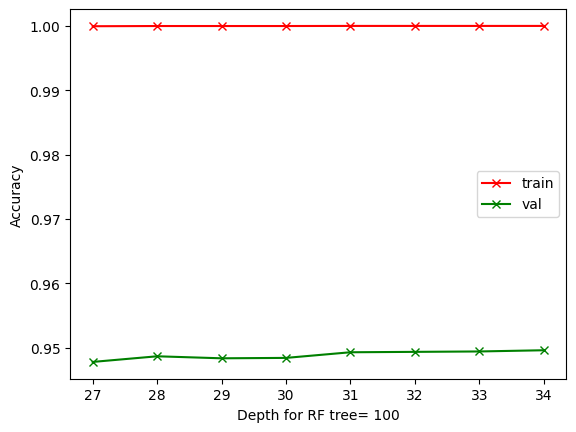

In [ ]:
plt.plot(depths, d_train_score,'r-x',label='train')
plt.plot(depths, d_val_score,'g-x', label='val')
plt.xlabel(f"Depth for RF tree= {opt_trees}")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
#Optimal depth based on validation accuracy
ind = d_val_score.index(max(d_val_score))
opt_depth = depths[ind]
print(f"The optimal number of depth in the RF classifier: {opt_depth}")

The optimal number of depth in the RF classifier: 34


In [ ]:
#Create an optimized depth and tree RF model
RF2 = RandomForestClassifier(n_estimators=opt_trees, max_depth = opt_depth, random_state = 1)
RF2.fit(x_train1, y_train1) #Training on the validation set
optimized_pred = RF2.predict(x_test) #Predicting on the ACTUAL test set

Score: 0.95065
Classification Report Optimized Depth and Trees: 
              precision    recall  f1-score   support

      GALAXY       0.97      0.95      0.96     10314
         QSO       0.92      0.91      0.92      2098
        STAR       0.94      0.96      0.95      7588

    accuracy                           0.95     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



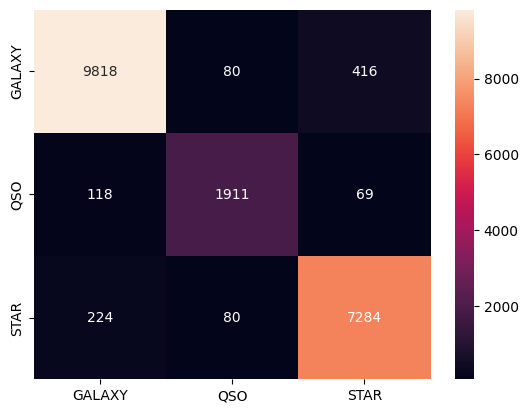

In [ ]:
print(f"Score: {RF2.score(x_test, y_test)}")
print(f"Classification Report Optimized Depth and Trees: ")
print(classification_report(y_test, optimized_pred))
cm2 = confusion_matrix(y_test, optimized_pred)

sns.heatmap(cm2, annot=True, fmt='d', xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
plt.show()

Classification Report Optimized Trees Only: 
Score: 0.9507
              precision    recall  f1-score   support

      GALAXY       0.97      0.95      0.96     10314
         QSO       0.92      0.91      0.92      2098
        STAR       0.94      0.96      0.95      7588

    accuracy                           0.95     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



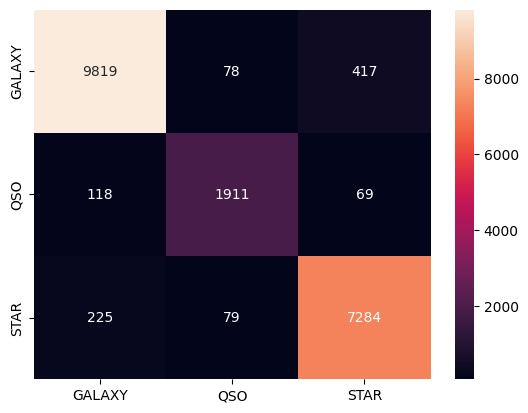

In [ ]:
#Unoptimized depth classification report and score

print(f"Classification Report Optimized Trees Only: ")
print(f"Score: {RF.score(x_test, y_test)}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
plt.show()

Comparing the performance metrics of the RF with optimized trees and RF with optimized depth and trees, a few marginal differences can be observed.
- The accuracy of the tree optimized RF marginally outperforms the fully optimized RF (95.07% vs 95.065%). This is likely due to training the model on the validation set rather than the actual testing set, resulting in this interesting occurrence of the fully optimized RF performing worse than the tree only optimized RF.


- All of the performance metrics remains the same for both models.

- GALAXY

Precision: 97% of predicted GALAXY are indeed GALAXY

Recall: 95% of actual GALAXY are predicted as GALAXY

F1-Score: 96%, a good balanced score considering both precision and recall.

- QSO

Precision: 92% of predicted QSO are indeed QSO

Recall: 91% of actual QSO are predicted as QSO

F1-Score: 92%, a good balanced score considering both precision and recall.

- STAR

Precision: 94% of predicted STAR are indeed STAR

Recall: 96% of actual STAR are predicted as STAR

F1-Score: 95%, a good balanced score considering both precision and recall.



### Confusion Matrix Analysis
- However, observing the confusion matrix, the tree-optimized RF classify 1 more Galaxy record compared to the fully optimized RF.

###Optimize Tree and Depth:
GALAXY: 9818

QSO: 1911

STAR: 7284

###Optimized Tree:

GALAXY: 9819

QSO: 1911

STAR: 7284


### Conclusion
Therefore, in actual values, the optimized tree RF outperforms the fully optimized RF by 1 classification and thus, it is the champion model.

The proposed optimal trees is 100 and optimal depth is kept as default.


In [ ]:
#Visualizing 50th tree for optimized tree RF
dt50 = RF.estimators_[50]
dt50.get_depth()

33

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.150179 to fit



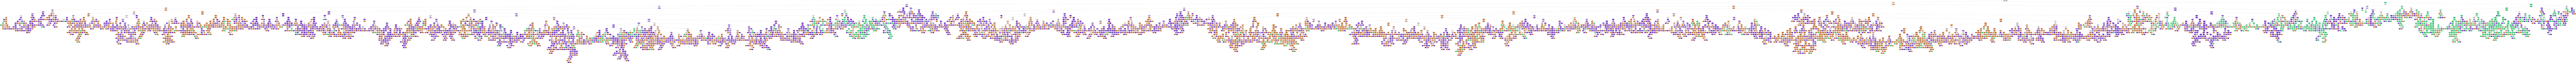

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt50, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = features,
                class_names=['GALAXY', 'QSO', 'STAR'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())